# [NTDS'18] milestone 2: network models
[ntds'18]: https://github.com/mdeff/ntds_2018

[Hermina Petric Maretic](https://people.epfl.ch/hermina.petricmaretic), [EPFL LTS4](https://lts4.epfl.ch)

## Students

* Team: `4`
* Students: `Julien Berger, Jérémy Jayet, Hana Samet, Mathieu Shiva`
* Dataset: `IMDb Films and Crew`

## Rules

* Milestones have to be completed by teams. No collaboration between teams is allowed.
* Textual answers shall be short. Typically one to two sentences.
* Code has to be clean.
* In the first part, you cannot import any other library than we imported. In the second part, you are allowed to import any library you want.
* When submitting, the notebook is executed and the results are stored. I.e., if you open the notebook again it should show numerical results and plots. We won't be able to execute your notebooks.
* The notebook is re-executed from a blank state before submission. That is to be sure it is reproducible. You can click "Kernel" then "Restart & Run All" in Jupyter.

## Objective

The purpose of this milestone is to explore various random network models, analyse their properties and compare them to your network. In the first part of the milestone you will implement two random graph models and try to fit them to your network. In this part you are not allowed to use any additional package. In the second part of the milestone you will choose a third random graph model that you think shares some properties with your network. You will be allowed to use additional packages to construct this network, but you must explain your network choice. Finally, make your code as clean as possible, and keep your textual answers short.

## Part 0

Import the adjacency matrix of your graph that you constructed in milestone 1, as well as the number of nodes and edges of your network.

In [1]:
%matplotlib inline

import random

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy
import queue as Q

In [2]:
adjacency =  np.load('./data/adjacency.npy')

adjacency[adjacency <2]=0

n_nodes =  adjacency.shape[0]
n_edges =  np.count_nonzero(adjacency)/2

## Part 1

**For the computation of this part of the milestone you are only allowed to use the packages that have been imported in the cell below.**

In [3]:
# We moved the code above

### Question 1

Create a function that constructs an Erdős–Rényi graph.

In [4]:
def erdos_renyi(n, p, seed=None):
    """Create an instance from the Erdos-Renyi graph model.

    Parameters
    ----------
    n: int
        Size of the graph.
    p: float
        Edge probability. A number between 0 and 1.
    seed: int (optional)
        Seed for the random number generator. To get reproducible results.

    Returns
    -------
    adjacency
        The adjacency matrix of a graph.
    """

    np.random.seed(seed)

    adjacency = np.zeros((n,n), dtype=float)

    for i in range(1,n):
        for j in range(0,i):
            adjacency[i,j] = (np.random.random()<p)
            adjacency[j,i] = adjacency[i,j]

    return adjacency

Text(0.5, 1.05, 'Erdos-Renyi (5, 0.6)')

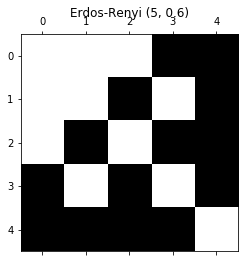

In [5]:
er = erdos_renyi(5, 0.6, 9765)
plt.spy(er)
plt.title('Erdos-Renyi (5, 0.6)')

Text(0.5, 1.05, 'Erdos-Renyi (10, 0.4)')

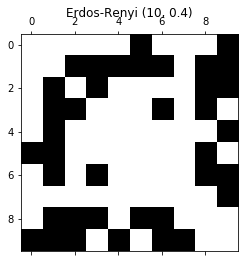

In [6]:
er = erdos_renyi(10, 0.4, 7648)
plt.spy(er)
plt.title('Erdos-Renyi (10, 0.4)')

### Question 2

Use the function to create a random Erdos-Renyi graph. Choose the parameters such that number of nodes is the same as in your graph, and the number of edges similar. You don't need to set the random seed. Comment on your choice of parameters.

In [7]:
p = n_edges/((n_nodes*n_nodes/2)-n_nodes)

er = erdos_renyi(n_nodes, p)

The number of nodes is *n_nodes*, given by the size of the first (or the second) dimension of the adjacency matrix. The probability *p* is equal to the number of edges divided by the number of possible edges, formally : $p = \frac{n_{edges}}{\frac{n_{nodes}^2}{2}-n_{nodes}}$

### Question 3

Create a function that constructs a Barabási-Albert graph.

In [8]:
def barabasi_albert(n, m, seed=None, m0=2):
    """Create an instance from the Barabasi-Albert graph model.
    
    Parameters
    ----------
    n: int
        Size of the graph.
    m: int
        Number of edges to attach from a new node to existing nodes.
    seed: int (optional)
        Seed for the random number generator. To get reproducible results.
    
    Returns
    -------
    adjacency
        The adjacency matrix of a graph.
    """
    
    random.seed(seed)
     # Add m initial nodes (m0 in Lecture) 
    adjacency = np.zeros((n, n), dtype=int)
    
    #start with m0 nodes, with arbitrarily chosen links (with at least one link per node)
    for i in range(m0):
        node=random.randint(1, m0)
        while (node==i):
            node=random.randint(1, m0)
            
        adjacency[i,node]=1
        adjacency[node,i]=1 

    # List of existing nodes, with nodes repeated once for each adjacent edge 
    repeated_nodes=[] 
    #filling the repeated_node with the created m node 
    for i in range(m0):
        tmp=sum(adjacency[i])
        while (tmp>=0):
            repeated_nodes.extend([i]) 
            tmp=tmp-1 
    
    # Start adding the other n-m nodes. The first node is m. 
    source=m0+1 
    #The easiest way of picking nodes with probability proportional to their degree is to maintain a list
    #of node labels where each node appears as many times as its degree is, 
    # and then just pick a random element from the list
    if m0 < m : 
        m=m0 # m should always be smaller or equal to m0
    while source<n: 
        # Now choose m nodes from the existing nodes 
        # Pick uniformly from repeated_nodes (preferential attachement) 
        targets = random.sample(repeated_nodes,m) 
        for i in targets:
            adjacency[i,source]=1
            adjacency[source,i]=1
            repeated_nodes.extend([source]) 
            repeated_nodes.extend([i])
        source += 1
     
    return adjacency

Text(0.5, 1.05, 'Barabasi-Albert (5, 1)')

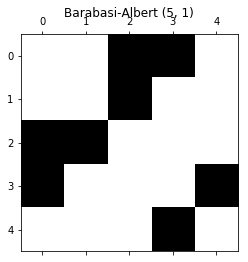

In [9]:
ba = barabasi_albert(5, 1, 9087)
plt.spy(ba)
plt.title('Barabasi-Albert (5, 1)')

Text(0.5, 1.05, 'Barabasi-Albert (10, 2)')

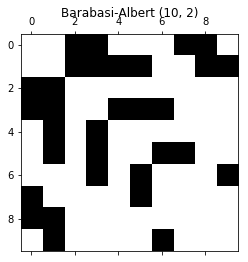

In [10]:
ba = barabasi_albert(10, 2, 8708)
plt.spy(ba)
plt.title('Barabasi-Albert (10, 2)')

### Question 4

Use the function to create a random Barabási-Albert graph. Choose the parameters such that number of nodes is the same as in your graph, and the number of edges similar. You don't need to set the random seed. Comment on your choice of parameters.

130177
130613.0


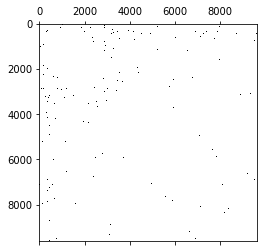

In [11]:
#n_nodes=t+m0
#n_edges=m*t+m0

m0=355 #  arbitrarily 
t=n_nodes-m0
m=int((n_edges-m0)/t)
print(m*t+m0)
print(n_edges)
ba = barabasi_albert(n_nodes, m ,8708,m0)
plt.spy(ba)


Based on the notes of the slides of network formation models we saw that after t steps, the network has N=t+m0 nodes and m*t +M0 links. So to obtain to same number of nodes, first we find t by computing the first equation replacing N with n_nodes of our original graph with a an arbitrarily chosen m0. Then we can find m to have a similar number of links so we compute an equality between the second equation with n-edges of our graph.

### Question 5

Compare the number of edges in all three networks (your real network, the Erdős–Rényi network, and the Barabási-Albert netowk).

In [12]:
n_edges_er =  np.count_nonzero(er)/2
n_edges_ba =  np.count_nonzero(ba)/2

print(f'The original network contains {n_edges} edges.')
print(f'The Erdős–Rényi network contains {n_edges_er} edges.') 
print(f'The Barabási-Albert network contains {n_edges_ba} edges.')

The original network contains 130613.0 edges.
The Erdős–Rényi network contains 130563.0 edges.
The Barabási-Albert network contains 129783.0 edges.


### Question 6

Implement a function that computes the [Kullback–Leibler (KL) divergence](https://en.wikipedia.org/wiki/Kullback%E2%80%93Leibler_divergence) between two probability distributions.
We'll use it to compare the degree distributions of networks.

In [13]:
def kl_divergence(p, q):
    """Compute the KL divergence between probability distributions of degrees of two networks.
    
    Parameters
    ----------
    p: np.array
        Probability distribution of degrees of the 1st graph.
    q: np.array
        Probability distribution of degrees of the 2nd graph.
    
    Returns
    -------
    kl
        The KL divergence between the two distributions.
    """
    kl = 0;
    
    # To deal with p and q of different sizes
    n = np.min([p.shape[0],q.shape[0]])
    
    for i in range(n):
        if q[i] != 0 and p[i]!=0:
            kl = kl + p[i]*np.log(p[i]/q[i])
    
    return kl

In [14]:
p_test = np.array([0.2, 0.2, 0.2, 0.4])
q_test = np.array([0.3, 0.3, 0.1, 0.3])
kl_divergence(p_test, q_test)

0.09151622184943575

### Question 7

Compare the degree distribution of your network to each of the two synthetic ones, in terms of KL divergence. **Hint:** Make sure you normalise your degree distributions to make them valid probability distributions.

In [15]:
#We import the find_components function that we had to create during the first milestone.
import src.find_components as fcomp

In [16]:
def probability_distribution(p,nb_split):
    """Returns the normalized probability distribution linearly separated into a certain number of splits.
    
    Parameters
    ----------
    p: numpy array
        The degree distribution 
        
    nb_split : int
        the number of splits used to create the normalized probability distribution
        (think of it as the number of bars in the histogram)  
    
    Returns
    -------
    numpy array of size nb_split
        the normalized probability distribution of the degree.
    """
    #we normalize the initial distribution of degree
    p=p/max(p)
    p_norm=np.zeros((nb_split), dtype=int)
    
    #we divide de interval between 0 and 1 in nb_split parts and we count the number of degrees in each interval
    for i in range(nb_split):
        p_split=np.where(np.logical_and((p>i/nb_split), p<=(i+1)/nb_split))
        p_norm[i]=np.shape(p_split)[1]
    
    #we now have a degree distribution which is discretised in nb_splits elements.
    #we normalize this degree distribution to obtain the probability density of degree distribution

    p_probability_distrib=p_norm/sum(p_norm)
    
    
   # #p_new_distrib is the normalized degree distribution in the new space (degrees between 0 and 1 )
   # normalized_range=np.arange(1,nb_split+1)/nb_split
   # p_new_distrib=[]
   # for i in range(p_norm.shape[0]):
   #     for j in range(np.transpose(p_norm)[i]):
   #         p_new_distrib=np.append(p_new_distrib,normalized_range[i])
             
    #weights_p = p_norm / float(sum(p_norm))
    #weights_q = q_norm/ float(sum(q_norm))
    #weights_p = np.ones_like(p_new_distrib) / float(p_new_distrib.shape[0])
    #weights_q = np.ones_like(q_new_distrib) / float(q_new_distrib.shape[0])      
    

    return p_probability_distrib

In [17]:
# We need to have a connected graph in order to find the kl divergence.
# As our network is not connected, we use the adjacency matrix of the largest connected component instead

# The first element of the connectedIndices matrix is a vector of length equal to n_nodes
# The value of its elements is 1 if the element is in the largest connected componenent and 0 if it is not
connectedIndices = fcomp.find_components(adjacency)
biggestComponentSize = np.amax(np.sum(connectedIndices, axis=1))

# get the adjacency matrix of the largest connected component of our network
indx=np.array(range(n_nodes),dtype=int)
indx=connectedIndices[0].astype(int)*indx
indx_without_zeros=np.unique(indx)

# take the unweighted version of the adjacency matrix
Biggest_component=adjacency[indx_without_zeros,:][:,indx_without_zeros]
Biggest_component[Biggest_component!=0]=1


In [18]:
#Take the normalized degree distribution for the largest connected component 
#of the original graph and for the ER graph

#We separate the probability distribution into 12 boxes 
#(if we take more the precision is not good enough and we get divisions by 0)
nb_split=50

degree_er = np.sum(er, axis=0)
degree_er = degree_er/sum(degree_er)

degree_biggest = np.sum(Biggest_component, axis=0)
degree_biggest=degree_biggest/sum(degree_biggest)

#Transform the degree distribution into probability distribution
prob_distrib_er=probability_distribution(degree_er,nb_split)
prob_distrib_biggest=probability_distribution(degree_biggest,nb_split)

#plt.hist(prob_distrib_biggest, weights=weights, rwidth=.5, bins=50);
tmp=kl_divergence(prob_distrib_er,prob_distrib_biggest)

print('The KL divergence between the original graph and the Erdős–Rényi graph is equal to {:.5f}'.format(tmp))

The KL divergence between the original graph and the Erdős–Rényi graph is equal to 4.49649


In [19]:
#Take the normalized degree distribution for BA graph
degree_ba = np.sum(ba, axis=0)
degree_ba=degree_ba/sum(degree_ba)

#Transform the degree distribution into probability distribution
prob_distrib_ba=probability_distribution(degree_ba,nb_split)

tmp=kl_divergence(prob_distrib_ba,prob_distrib_biggest)
print('The KL divergence between the original graph and the Barabási-Albert graph is equal to {:.5f}'.format(tmp))

The KL divergence between the original graph and the Barabási-Albert graph is equal to 0.92486


### Question 8

Plot the degree distribution historgrams for all three networks. Are they consistent with the KL divergence results? Explain.

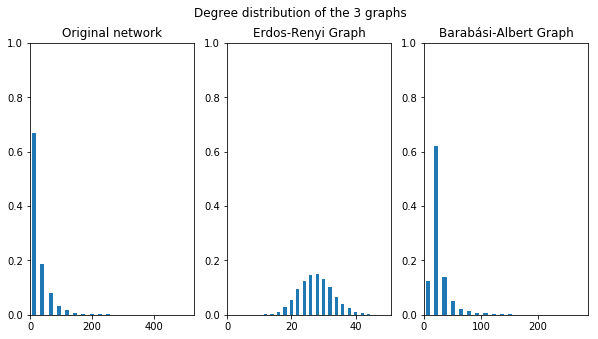

In [20]:
#The histogram of our original network

# we use the unweighted adjacency matrix
unweighted_adjacency=adjacency
unweighted_adjacency[unweighted_adjacency != 0] = 1;
degree = np.sum(unweighted_adjacency, axis=0);
weights = np.ones_like(degree) / float(n_nodes)
#plt.hist(degree, weights=weights, rwidth=.5);

#The histogram of the Erdos-Renyi graph
degree_er = np.sum(er, axis=0);
weights = np.ones_like(degree_er) / float(n_nodes)
#plt.hist(degree_er, weights=weights, rwidth=.5);

#The histogram of the Barabási-Albert graph
degree_ba = np.sum(ba, axis=0);
weights = np.ones_like(degree_ba) / float(n_nodes)
#plt.hist(degree_ba, weights=weights, rwidth=.5);

plt.figure(figsize=(10, 5))
plt.subplot(131);
plt.hist(degree, weights=weights, bins=20, rwidth=.5);
plt.title('Original network');
plt.axis([0,degree.max(),0,1])

plt.subplot(132);
plt.hist(degree_er, weights=weights, bins=20, rwidth=.5);
plt.title('Erdos-Renyi Graph');
plt.axis([0,degree_er.max(),0,1])

plt.subplot(133);
plt.hist(degree_ba, weights=weights,bins=20,  rwidth=.5);
plt.title('Barabási-Albert Graph');
plt.axis([0,degree_ba.max(),0,1])

plt.suptitle('Degree distribution of the 3 graphs')
plt.show()

As we can see, the Barabási-Albert degree distribution looks similar to the original network distribution. We can also see that the Erdos-Renyi degree distribution is quite different from the other two.
This is consistent since we obtain a lower KL divergence between the original graph and the BA graph than between the original graph and the ER graph. The KL divergence should be equal to 0 if two distributions are similar, so the lower the score, the more similar the distributions.

### Question 9

Imagine you got equal degree distributions. Would that guarantee you got the same graph? Explain.

No, because the degree distribution doesn't give information on how the edges in the network are connected. For exemple if we take a simple example with 6 nodes, we can have the exact same degree distribution, but not the same graph.
Let's consider the example below:

## Part 2

**You are allowed to use any additional library here (e.g., NetworkX, PyGSP, etc.).** Be careful not to include something here and use it in part 1!

In [21]:
import networkx as nx

### Question 10

Choose a random network model that fits you network well. Explain your choice. 

**Hint:** Check lecture notes for different network models and their properties. Your choice should be made based on at least one property you'd expect to be similar.

From the 2 network models seen above, we think that the Barabasi-Albert model is the one that would fit our model the best. The first property that we expect to be similar is the degree distribution,that follows a scale-free trend, as seen in part 1.

However, we first decided to test the configuration model. This choice is based on the degree distribution property, so we expect this model to have a similar density, number of connected components and diameter. As this model requires an initial degree distribution, the model that will be created will simply rewire the connections between the nodes. This means that parameters such as density or the number of single nodes should remain the same.

We then modified the Barabasi-Albert model to have a non-connected graph that are formed following the growth and preferential attachment process. We expect to have a similar density and a similar number of nodes in the biggest component. We hope it would fit our initial network better and called this new model the "random actor network model".

Comparing the properties that we will obtain for both, we will then choose the closest fit to the original graph.

### Question 11

Explain (in short) how the chosen model works.

#### The configuration model
It creates a adjacency matrix of a network that has the same degree distribution as the desired original network.

Starting from an initial degree distribution, you randomly pick two "stubs" and connect them together until every stub has been connected. This means that the degree distribution(and thus the number of edges) will be the same, but the adjacency matrix will be randomized.

This model follows the growth process but respects the predefined degree distribution that is given as a parameter. It also follows the preferential attachment as in the node are tended to be linked to the more connected nodes but within the range the range of degree given in by the parameter.

#### The random actor network model
This model is a modified version of the Barabási-Albert model, but instead of adding a node with m links each time we add a node with a number of link m', taken from a normal distribution centered at m’ with a certain standard deviation that is given to the function as parameter. This enables us to have a scale free network that conserve the similarities obtained in part 1 but can be non-connected as our original graph and can have multiple connected components."

### Question 12

Create a random graph from that model, such that the number of nodes is the same as in your graph.

In [22]:
def configuration_model(distrib,seed=None):
    """Create a configuration model from a predifined degree distribution
    
    Parameters
    ----------
    distrib: numpy array
        degree distribution

    seed: int (optional)
        Seed for the random number generator. To get reproducible results.
    
    Returns
    -------
    adjacency
        The adjacency matrix of a graph.
    """
    n_nodes=distrib.shape[0]
    adjacency = np.zeros((n_nodes, n_nodes), dtype=int)
    
    #this list contains the nodes that still have unconnected stubs (so we first remove nodes with 0 degrees)    
    linked_stubs=distrib
    not_connected_nodes=np.nonzero(distrib)
    not_connected_nodes=not_connected_nodes[0]
    remaining_elements=not_connected_nodes.shape[0]
    similar_iter=0;
    while(similar_iter<300):
        similar_iter=similar_iter+1
        #we select two nodes that have unconnected stubs to link them
        idx1=np.random.randint(0,remaining_elements,1)
        idx2=np.random.randint(0,remaining_elements,1)
        while (idx1==idx2):
            idx2=np.random.randint(0,remaining_elements,1)
            
        node1=not_connected_nodes[idx1]
        node2=not_connected_nodes[idx2]
        
        #we connect the nodes
        adjacency[node1,node2]=1
        adjacency[node2,node1]=1

        #we check if all the stubs of the two node have been connected and if so, we remove them from the not_connected_nodes array
        if sum(sum(adjacency[node1]))>=distrib[node1]:
            not_connected_nodes=np.delete(not_connected_nodes,idx1)
            remaining_elements=remaining_elements-1
            similar_iter=0

        if sum(sum(adjacency[node2]))>=distrib[node2]:
            not_connected_nodes=np.delete(not_connected_nodes,idx2)
            remaining_elements=remaining_elements-1
            similar_iter=0
        
    return adjacency

In [23]:
#Creation of a configuration model with the same degree distribution.
unweighted_adjacency=adjacency
unweighted_adjacency[unweighted_adjacency!=0]=1
degree_initial = np.sum(unweighted_adjacency, axis=0)

configuration_adjacency=configuration_model(degree_initial,69)



In [24]:
def random_actor_network_model(n, m, std, seed=None, m0=2):
    """Create an instance from the Barabasi-Albert graph model.
    
    Parameters
    ----------
    n: int
        Size of the graph.
    m: int
        Number of edges to attach from a new node to existing nodes.
    seed: int (optional)
        Seed for the random number generator. To get reproducible results.
    
    Returns
    -------
    adjacency
        The adjacency matrix of a graph.
    """
    
    random.seed(seed)
    # Add m initial nodes (m0 in Lecture) 
    adjacency = np.zeros((n, n), dtype=int)
    
    #start with m0 nodes, with arbitrarily chosen links (with at least one link per node)
    for i in range(m0):
        node=random.randint(1, m0)
        while (node==i):
            node=random.randint(1, m0)
            
        adjacency[i,node]=1
        adjacency[node,i]=1 

    # List of existing nodes, with nodes repeated once for each adjacent edge 
    repeated_nodes=[] 
    #filling the repeated_node with the created m node 
    for i in range(m0):
        tmp=sum(adjacency[i])
        while (tmp>=0):
            repeated_nodes.extend([i]) 
            tmp=tmp-1 
    
    # Start adding the other n-m nodes. The first node is m. 
    source=m0+1 
    #The easiest way of picking nodes with probability proportional to their degree is to maintain a list
    #of node labels where each node appears as many times as its degree is, 
    # and then just pick a random element from the list
    if m0 < m : 
        m=m0 # m should always be smaller or equal to m0
    while source<n:
        
        # Choose a number of node from a normal distribution with a certain standard deviation
        mLinksForAddedNode = int(np.around(np.random.normal(m,std)))
        
        # To avoid to ask for a negative number of samples
        if mLinksForAddedNode < 1 :
            mLinksForAddedNode = 0
        
        # Now choose m nodes from the existing nodes 
        # Pick uniformly from repeated_nodes (preferential attachement) 
        targets = np.random.choice(repeated_nodes,mLinksForAddedNode) 
        for i in targets:
            adjacency[i,source]=1
            adjacency[source,i]=1
            repeated_nodes.extend([source]) 
            repeated_nodes.extend([i])
        source += 1
     
    return adjacency


#############################################################################################################

# Create the network
std = 12 # We chose this value by iteration. We started with std=5 and went to std=14. We kept the best value.

an = random_actor_network_model(n_nodes, m, std,8708,m0)

### Question 13

Check the properties you expected to be similar, and compare to your network.

In [25]:
#Comparison of properties using network x
G_original=nx.from_numpy_matrix(adjacency)
G_config=nx.from_numpy_matrix(configuration_adjacency)

print("density original network: %s" % nx.density(G_original))
print("density configuration network: %s" % nx.density(G_config))

print("Nb connected components original network: %d" % nx.number_connected_components(G_original))
print("Nb connected components configuration network: %d" % nx.number_connected_components(G_config))

#take the largest connected components and draw their diameters
Gc_original = max(nx.connected_component_subgraphs(G_original), key=len)
Gc_config = max(nx.connected_component_subgraphs(G_config), key=len)

print("Nb nodes Giant component original network: %d" % nx.number_of_nodes(Gc_original))
print("Nb nodes Giant component configuration network: %d" % nx.number_of_nodes(Gc_config))

diameterGcOriginal = nx.diameter(Gc_original)

print("diameter original network: %d" % diameterGcOriginal)
print("diameter configuration network: %d" % nx.diameter(Gc_config))

print("average clustering coefficient original network: %s" % nx.average_clustering(Gc_original))
print("average clustering coefficient configuration network: %s" % nx.average_clustering(Gc_config))

density original network: 0.0028183137984935302
density configuration network: 0.002690811817562855
Nb connected components original network: 343
Nb connected components configuration network: 343
Nb nodes Giant component original network: 9276
Nb nodes Giant component configuration network: 9284
diameter original network: 10
diameter configuration network: 9
average clustering coefficient original network: 0.3692815672561474
average clustering coefficient configuration network: 0.010523324329884832


In [28]:
#Comparison of properties using network x
G_original=nx.from_numpy_matrix(adjacency)
G_an=nx.from_numpy_matrix(an)

print("density original network: %s" % nx.density(G_original))
print("density new BA network: %s" % nx.density(G_an))

print("Nb connected components original network: %d" % nx.number_connected_components(G_original))
print("Nb connected components new BA network: %d" % nx.number_connected_components(G_an))

#take the largest connected components and draw their diameters
Gc_original = max(nx.connected_component_subgraphs(G_original), key=len)
Gc_an = max(nx.connected_component_subgraphs(G_an), key=len)

print("Nb nodes Giant component original network: %d" % nx.number_of_nodes(Gc_original))
print("Nb nodes Giant component new BA network: %d" % nx.number_of_nodes(Gc_an))

print("diameter original network: %d" % diameterGcOriginal)
print("diameter new BA network: %d" % nx.diameter(Gc_an))

print("average clustering coefficient original network: %s" % nx.average_clustering(Gc_original))
print("average clustering coefficient new BA network: %s" % nx.average_clustering(Gc_an))

density original network: 0.0028183137984935302
density new BA network: 0.002895928390710088
Nb connected components original network: 343
Nb connected components new BA network: 1228
Nb nodes Giant component original network: 9276
Nb nodes Giant component new BA network: 8401
diameter original network: 10
diameter new BA network: 6
average clustering coefficient original network: 0.3692815672561474
average clustering coefficient new BA network: 0.015789912156122164


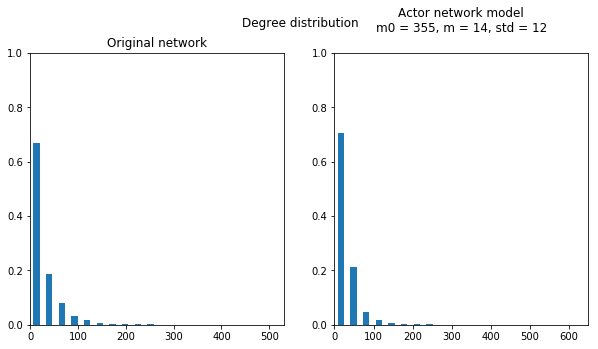

The original network contains 130613.0 edges.
The actor network model contains 134210.0 edges.

The biggest component of the model has a size of 8401.0.In comparison, the biggest component of the original graph has a size of 9276.0 

The KL divergence between the original network and the model is 0.0046438627933696585


In [29]:
#The histogram of the actor network model graph
degree_an = np.sum(an, axis=0);
weights = np.ones_like(degree_an) / float(n_nodes)

plt.figure(figsize=(10, 5))
plt.subplot(121);
plt.hist(degree, weights=weights, bins=20, rwidth=.5);
plt.title('Original network');
plt.axis([0,degree.max(),0,1])

plt.subplot(122);
plt.hist(degree_an, weights=weights,bins=20,  rwidth=.5);
plt.title(f'Actor network model\nm0 = {m0}, m = {m}, std = {std}\n');
plt.axis([0,degree_an.max(),0,1])

plt.suptitle(f'Degree distribution\n\n')

plt.show()

n_edges_an =  np.count_nonzero(an)/2

print(f'The original network contains {n_edges} edges.\nThe actor network model contains {n_edges_an} edges.\n')

# We need to have a connected graph in order to find the kl divergence.
# The model is not connected, we will find the largest connected component

# The first element of the connectedIndices matrix is a vector of length equal to n_nodes
# The value of its elements is 1 if the element is in the largest connected component and 0 if it is not
connectedIndicesAn = fcomp.find_components(an)
biggestComponentSizeAn = np.amax(np.sum(connectedIndicesAn, axis=1))

print(f'The biggest component of the model has a size of {biggestComponentSizeAn}.\
In comparison, the biggest component of the original graph has a size of {biggestComponentSize} \n')

# get the adjacency matrix of the largest connected component of our network
indx=np.array(range(n_nodes),dtype=int)
indx=connectedIndicesAn[0].astype(int)*indx
indx_without_zeros=np.unique(indx)

# take the unweighted version of the adjacency matrix
BiggestComponentAn = adjacency[indx_without_zeros,:][:,indx_without_zeros]
BiggestComponentAn[BiggestComponentAn != 0] = 1

degreeBiggestAn = np.sum(BiggestComponentAn, axis=0)
degreeBiggestAn=degreeBiggestAn/sum(degreeBiggestAn)

prob_distrib_biggestAn=probability_distribution(degreeBiggestAn,nb_split)

#np.min(degreeBiggestAn)

divergence = kl_divergence(prob_distrib_biggest,prob_distrib_biggestAn)

print(f'The KL divergence between the original network and the model is {divergence}')


Are the results what you expected? Explain.

Studying the two networks and comparing them to our original graph we did obtain the similar expected properties.

With the *configuration model*, we have very close fit but since this model needs a predefined degree of distribution of the original graph as parameter, it is not ideal. So, We can say that the configuration model is far from being optimal and we can choose on the *random actor network model* to get a good fit with no prior knowledge of what the original graph looks like.

With the *random actor network model*, we obtained close properties to our original graph, such as a similar degree distribution, about the same size of giant component and number of single nodes close to our original graph.

Except for the <abbr title="standard deviation">std</abbr> parameter, the other parameters come from the Barabási-Albert model. The std parameter can be used to "shape" the degree distribution to obtain one similar to our original graph.

We chose std by iteration. Here are 3 different degree distibutions (original graph vs *random actor network model*), for 3 values of std.

<!-- ![std = 8](assets/anm_degree_distrib_std=8.png) -->

![std = 10](https://github.com/swouf/ntds_IMDb_team4/raw/milestone2/assets/anm_degree_distrib_std%3D10.png)

![std = 12](https://github.com/swouf/ntds_IMDb_team4/raw/milestone2/assets/anm_degree_distrib_std%3D12.png)

![std = 14](https://github.com/swouf/ntds_IMDb_team4/raw/milestone2/assets/anm_degree_distrib_std%3D14.png)